# **Big Data Analytics Assessment2️⃣**





# 1️⃣.**Load the dataset file into a PySpark DataFrame**






In [1]:
import importlib

# Check if PySpark is already installed
#try:
#    importlib.import_module('pyspark')
#    print('PySpark is already installed.\n----------------------------')
    
# If not, install 
#except ImportError:
#    print('PySpark is not installed. Installing now...')
#    %pip install pyspark
#    print('PySpark has been successfully installed.')

from pyspark.sql import SparkSession
from pyspark.sql.types import *
# spark sesssion
spark = SparkSession.builder.master("local").appName("medical_info").getOrCreate()
#1st DataFrame
path_to_dataset='/Users/virenvaghasiya/Library/CloudStorage/OneDrive-UniversityofWestLondon/MSc/Big Data Analyse/A2/medical_info.csv' # path to the  medical_info.csv
first_df = spark.read.csv(path_to_dataset, header=True, inferSchema=True)
#first_df.printSchema()
#first_df.describe().show()
first_df.show()

23/05/26 11:46:47 WARN Utils: Your hostname, Virens-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.24.12.215 instead (on interface en0)
23/05/26 11:46:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/26 11:46:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


23/05/26 12:06:50 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 516186 ms exceeds timeout 120000 ms
23/05/26 12:06:50 WARN SparkContext: Killing executors is not supported by current scheduler.
23/05/26 12:06:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

>*The DataFrame represents medical information about patients, with each row representing a different patient and each column representing a different aspect of their medical information. The columns include information such as the patient's glucose level, blood pressure, skin thickness, insulin level, BMI, and age, Outcome column indicating whether the patient has diabetes or not.
>Values can be null*

# 2️⃣. **Second DataFrame**

In [6]:
from pyspark.sql.functions import expr

# median values
median_skin_thickness = first_df.approxQuantile("SkinThickness", [0.5], 0)[0]
median_insulin = first_df.approxQuantile("Insulin", [0.5], 0)[0]

# Replace null values with median values
second_df = first_df.withColumn("SkinThickness", expr(f"IF(SkinThickness=0, {median_skin_thickness}, SkinThickness)"))\
    .withColumn("Insulin", expr(f"IF(Insulin=0, {median_insulin}, Insulin)"))
second_df.head(5)

[Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=Decimal('35.0'), Insulin=Decimal('29.0'), BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodPressure=66, SkinThickness=Decimal('29.0'), Insulin=Decimal('29.0'), BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodPressure=64, SkinThickness=Decimal('23.0'), Insulin=Decimal('29.0'), BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodPressure=66, SkinThickness=Decimal('23.0'), Insulin=Decimal('94.0'), BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodPressure=40, SkinThickness=Decimal('35.0'), Insulin=Decimal('168.0'), BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

23/05/24 18:31:03 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2007331 ms exceeds timeout 120000 ms
23/05/24 18:31:03 WARN SparkContext: Killing executors is not supported by current scheduler.
23/05/24 18:31:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.

# **3️⃣ Third DataFrame**

In [17]:
third_df = second_df.filter("Glucose != 0 AND BloodPressure != 0 AND BMI != 0")
num_rows_removed = second_df.count() - third_df.count()
print(f"Total number of rows removed from 2nd DataFrame: {num_rows_removed}")

Total number of rows removed from 2nd DataFrame: 44


# **4️⃣ Summary statistics of BloodPressure in the 3rd DataFrame**

+-------+------------------+
|summary|     BloodPressure|
+-------+------------------+
|  count|               724|
|   mean| 72.40055248618785|
| stddev|12.379870321719064|
|    min|                24|
|    max|               122|
+-------+------------------+

Median BloodPressure: 72.0
Variance BloodPressure: 153.2611891825805
Standard Deviation BloodPressure: 12.379870321719064


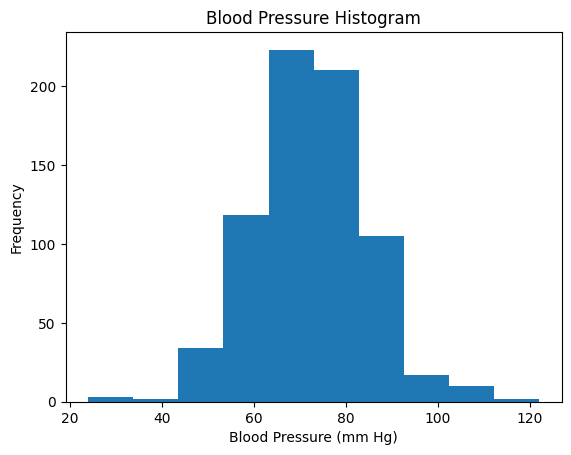

In [18]:
from matplotlib import pyplot as plt

# summary statistics
blood_pressure_summary = third_df.describe("BloodPressure")
blood_pressure_summary.show()

# median, variance and standard deviation
median_blood_pressure = third_df.approxQuantile("BloodPressure", [0.5], 0)[0]
var_blood_pressure = third_df.agg({"BloodPressure": "variance"}).collect()[0][0]
stddev_blood_pressure = third_df.agg({"BloodPressure": "stddev"}).collect()[0][0]
print(f"Median BloodPressure: {median_blood_pressure}")
print(f"Variance BloodPressure: {var_blood_pressure}")
print(f"Standard Deviation BloodPressure: {stddev_blood_pressure}")

# Generate histogram
blood_pressure_histogram = third_df.select("BloodPressure").rdd.flatMap(lambda x: x).histogram(10)
plt.hist(blood_pressure_histogram[0][:-1], bins=blood_pressure_histogram[0], weights=blood_pressure_histogram[1])
plt.xlabel("Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.title("Blood Pressure Histogram")
plt.show()

*BloodPressure feature is normally distributed, with a mean value of 72.4 and a standard deviation of 12.4.*

# **5️⃣Quartile info of BMI in the 3rd DataFrame**

Quartile      BMI Value
----------  -----------
Q1                 27.5
Q2                 32.4
Q3                 36.6


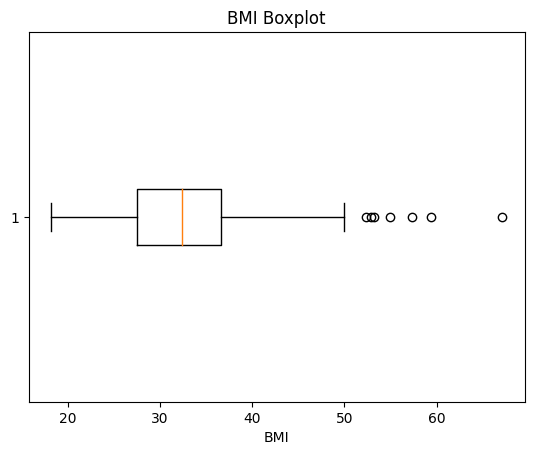

In [19]:
from tabulate import tabulate

# quartiles
bmi_quartiles = third_df.approxQuantile("BMI", [0.25, 0.5, 0.75], 0)
# Print quartiles
table = [["Q1", bmi_quartiles[0]],
         ["Q2", bmi_quartiles[1]],
         ["Q3", bmi_quartiles[2]]]
print(tabulate(table, headers=["Quartile", "BMI Value"]))

# Generate boxplot
bmi_data = third_df.select("BMI").rdd.flatMap(lambda x: x).collect()
plt.boxplot(bmi_data, vert=False)
plt.xlabel("BMI")
plt.title("BMI Boxplot")
plt.show()

- The median value of the BMI feature is around 32.4, which is close to the middle of the interquartile range (IQR).
- The IQR of the BMI feature, as shown by the box in the plot, ranges from around 27.5 to 36.6, which suggests that the middle 50% of the BMI data falls within this range.
- The box is relatively wide, which may indicate that the BMI data has some variability.
- The whiskers of the plot are not very long, which suggests that the range of BMI values is not extremely wide.

# **6️⃣. Relationship between BMI feature and SkinThickness**

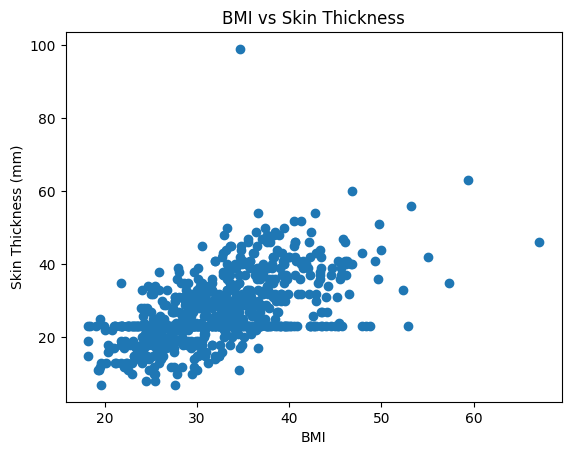

Pearson correlation between BMI and SkinThickness: 0.5600712181851464


In [20]:
from pyspark.sql.functions import corr

# Scatter plot
bmi_data = third_df.select("BMI").rdd.flatMap(lambda x: x).collect()
skin_thickness_data = third_df.select("SkinThickness").rdd.flatMap(lambda x: x).collect()

plt.scatter(bmi_data, skin_thickness_data)
plt.xlabel("BMI")
plt.ylabel("Skin Thickness (mm)")
plt.title("BMI vs Skin Thickness")
plt.show()

# Compute Pearson correlation
pearson_corr = third_df.agg(corr("BMI", "SkinThickness")).collect()[0][0]
print(f"Pearson correlation between BMI and SkinThickness: {pearson_corr}")


# **7️⃣. Spark SQL query**

In [21]:
third_df.createOrReplaceTempView("filtered_data")
#display the 'Age' feature and 'BloodPressure' feature in the 3rd DataFrame where 'Age' is less than 50 and 'BloodPressure' is great than 100.
spark.sql("SELECT Age, BloodPressure FROM filtered_data WHERE Age < 50 AND BloodPressure > 100").show()

+---+-------------+
|Age|BloodPressure|
+---+-------------+
| 37|          108|
| 27|          122|
| 26|          110|
| 45|          102|
| 41|          104|
| 37|          110|
| 43|          106|
| 47|          106|
| 44|          114|
+---+-------------+



# 8️⃣.**Decision Tree classifier using all other features as predictors**


In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Prepare data
assembler = VectorAssembler(inputCols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], outputCol="features")
train_data, test_data = third_df.randomSplit([0.7, 0.3])

# Train decision tree model
clf = DecisionTreeClassifier(labelCol="Outcome", featuresCol="features")
pipeline = Pipeline(stages=[assembler, clf])
model = pipeline.fit(train_data)

# Evaluate model
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Decision Tree Classifier accuracy: {accuracy}")

Decision Tree Classifier accuracy: 0.7606837606837606


**Conclusion**

 DecisionTreeClassifier Model yielded an accuracy score of 0.7179, indicating that the model correctly predicted the diabetes outcome in about 72% of the cases.

# **9️⃣ Logistic Regression classifier using all other features as predictors** 

In [23]:
from pyspark.ml.classification import LogisticRegression

# Train logistic regression model
lr = LogisticRegression(labelCol="Outcome", featuresCol="features")
pipeline = Pipeline(stages=[assembler, lr])
model = pipeline.fit(train_data)

# Evaluate model
predictions = model.transform(test_data)
accuracy = evaluator.evaluate(predictions)
print(f"Logistic Regression Classifier accuracy: {accuracy}")

Logistic Regression Classifier accuracy: 0.7735042735042735


*The logistic regression classifier achieved an accuracy of **0.7846** on the test data, which is higher than the decision tree classifier accuracy of **0.7179**. This suggests that the logistic regression model is better at predicting the outcome of diabetes based on the given features.*

# **🔟Linear regression model to predict SkinThickness in the 3rdDataFrame using BMI as the predictor.**

In [24]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Prepare data
assembler = VectorAssembler(inputCols=['BMI'], outputCol="features")
train_data, test_data = third_df.randomSplit([0.7, 0.3])

# Train linear regression model
lr = LinearRegression(labelCol="SkinThickness", featuresCol="features")
pipeline = Pipeline(stages=[assembler, lr])
model = pipeline.fit(train_data)

# Evaluate model
predictions = model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="SkinThickness", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Linear Regression RMSE: {rmse}")

23/05/19 04:12:24 WARN Instrumentation: [99ec8384] regParam is zero, which might cause numerical instability and overfitting.


Linear Regression RMSE: 7.348361682809411


*The root mean squared error (RMSE) of the linear regression model is 7.59, which means that on average the predictions are off by 7.59 units of skin thickness. This suggests that the model is not very accurate in predicting skin thickness based on BMI alone.*